In [1]:
dataDir = "/home/ababil/BUET/AV/location-2"     # Ababil
# dataDir = "D:/AV/Code/location-2"               # Pushpita
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2"

In [2]:
exec(open('init_notebook.py').read())

current working dir/home/ababil/BUET/AV/Behavior Hypotheses/behavior-hypotheses/src


In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

### Scenes 
| Scene | Min Y | Max X |
|-------|-------|-------|
| 210   | 5     | 6     |
| 211   | 5     | 6     |
| 220   | 6     | 6     |
| 221   | 9     | 6     |
| 222   | 9     | 6     |
| 230   | 6     | 6     |
| 231   | 2     | 6     |
| 240   | 6     | 6     |

- What does minYDisplacement and maxXDisplacement mean? 


In [6]:
sceneId = 221
date = "2023-05-04"
fps=10
minYDisplacement = 2
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [7]:
# # unique of roadWidth
# print(pedDf['roadWidth'].unique())

# pedDf

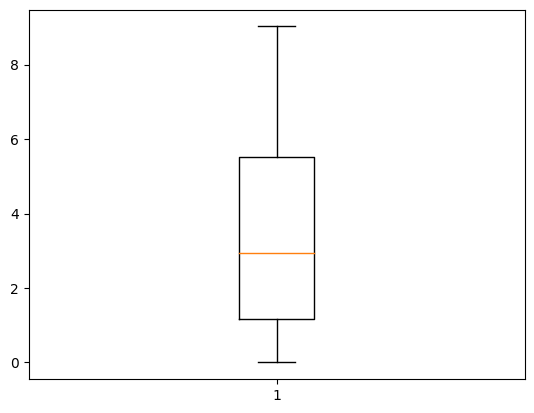

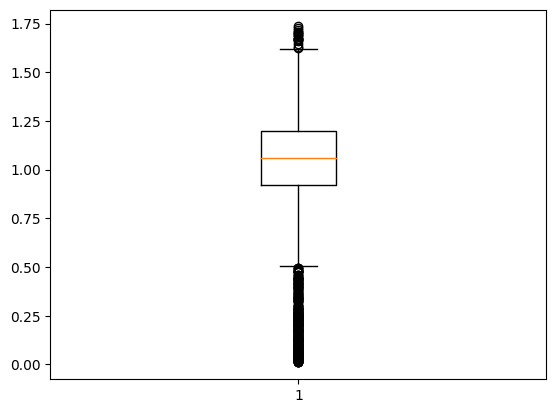

In [8]:
# visualizer = TrajectoryVisualizer()
# colMapper = ColMapper(
#         idCol='uniqueTrackId', 
#         xCol='sceneX', 
#         yCol='sceneY',
#         xVelCol='sceneXVelocity', 
#         yVelCol='sceneYVelocity', 
#         speedCol='speed',
#         xAccCol='sceneXAcceleration',
#         yAccCol='sceneYAcceleration',
#         accelerationCol='acceleration'
#     )
# transformer = TrajectoryTransformer(colMapper)
# cleaner = TrajectoryCleaner(
#     colMapper = colMapper,
#     minSpeed = 0.0, # we can consider them as obstacles
#     maxSpeed = 3.5,
#     minAcceleration = -10.0,
#     maxAcceleration = 10.0,
#     minYDisplacement = minYDisplacement,
#     maxXDisplacement = maxXDisplacement
# )

visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        fps=fps
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

transformer.deriveAxisVelocities(pedDf)
transformer.deriveSpeed(pedDf)
cleaner.cleanBySpeed(pedDf)
transformer.deriveDisplacements(pedDf)
# transformer.deriveAcceleration(pedDf)

# pedDf['acceleration'] = transformer.getAccelerationSeriesForAll(pedDf)

plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])
plt.show()

In [9]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)

# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
transformer.translateAllToLocalSource(cleanPedDf)

southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate(trackDf)
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y
len(cleanPedDf)


using min Y displacement (2)


TypeError: TrajectoryTransformer.rotate() missing 2 required positional arguments: 'xCol' and 'yCol'

Check the trajectories by visualizing the scenes, and the dataframe.

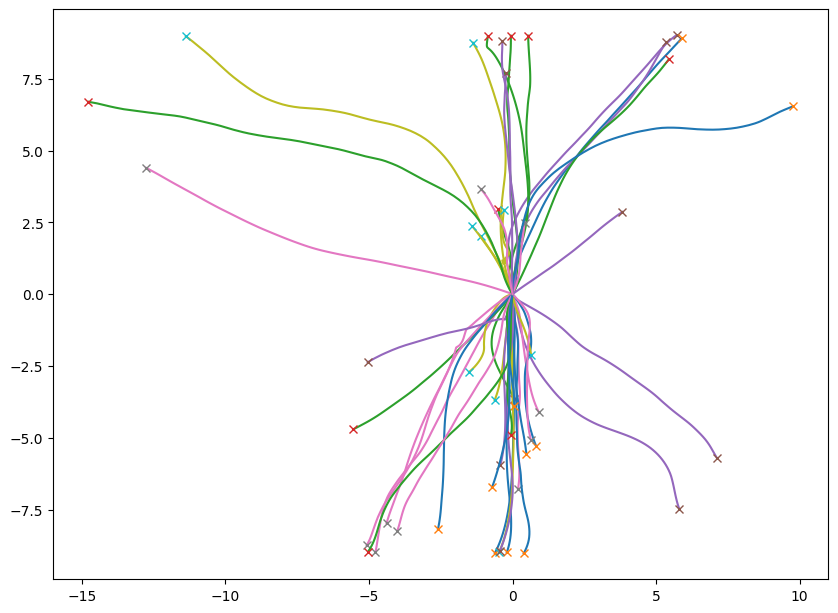

In [ ]:
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [ ]:
cleanPedDf

In [ ]:
# number of unique pedestrians
len(cleanPedDf["uniqueTrackId"].unique())

In [ ]:
# max and min values of speed
print(cleanPedDf['speed'].max())
print(cleanPedDf['speed'].min())

